In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
                'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
                'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv(url, header=None, names=column_names)
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [33]:
# Remember we used 30 features to train our data (and output is boolean(0, 1), representing B and M) (and rows are 569)
data.shape

(569, 32)

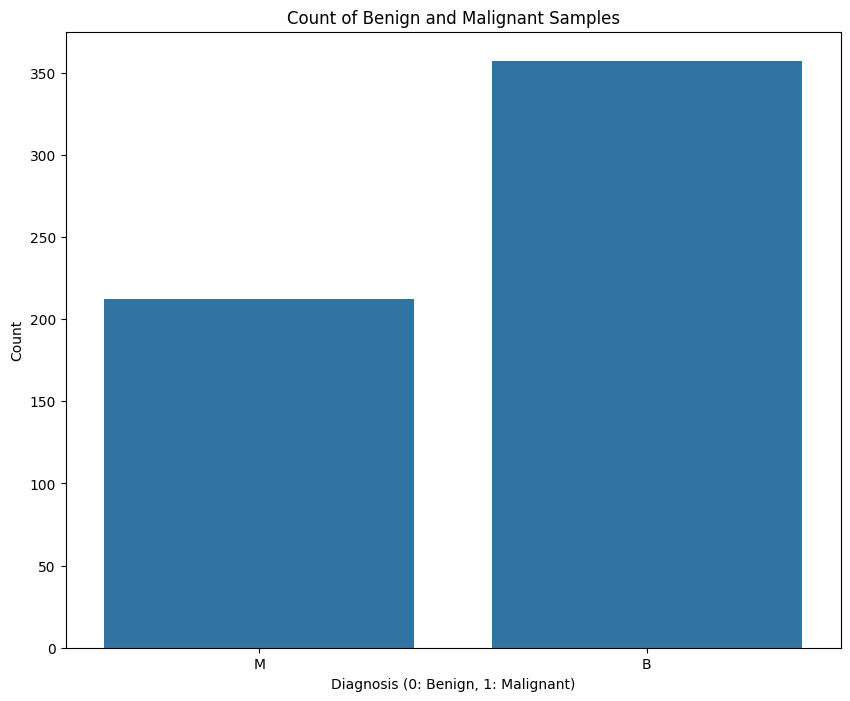

In [34]:
# Exploratory Data Analysis (EDA)
# Data Visualization
plt.figure(figsize=(10, 8))
sns.countplot(x='diagnosis', data=data)
plt.title('Count of Benign and Malignant Samples')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()


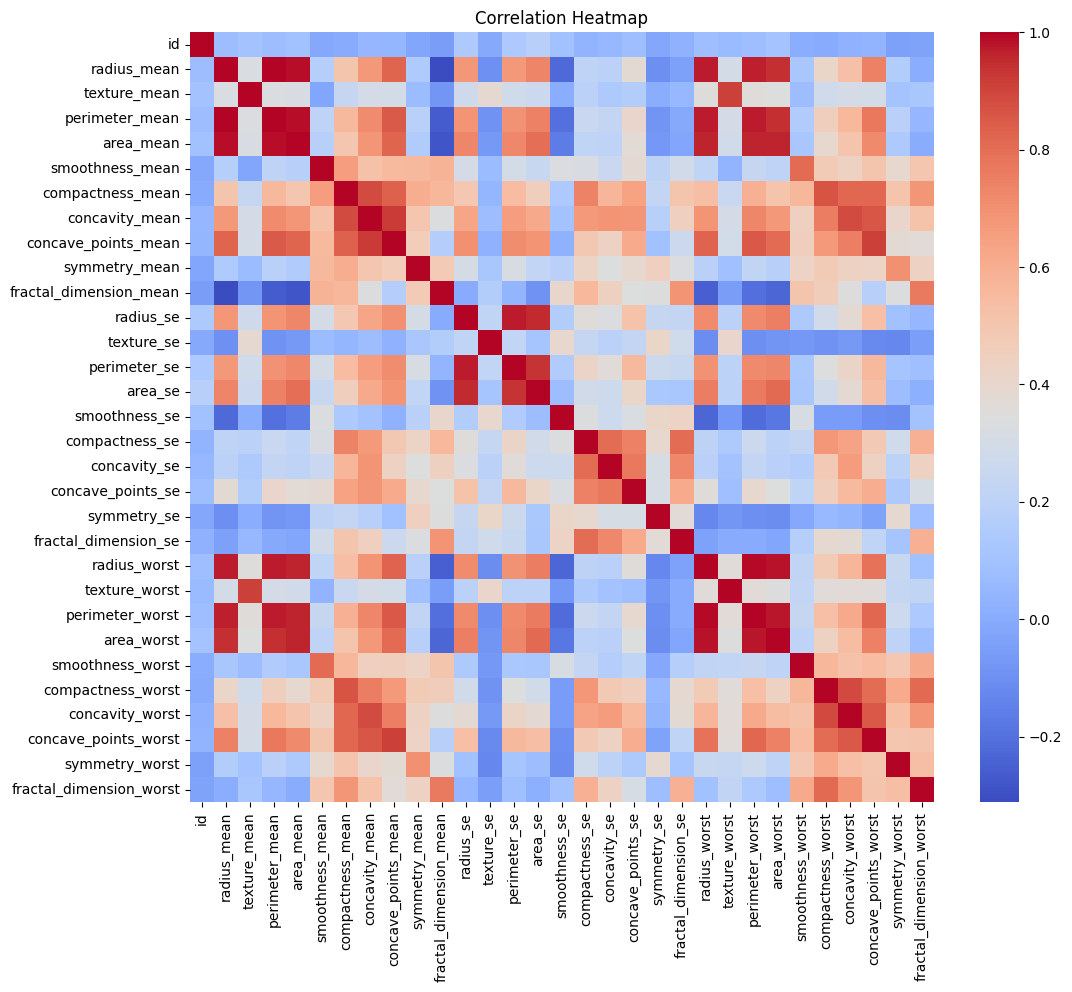

In [35]:
# Correlation Analysis (how each feature is related to another feature, darker the color stronger the relation)
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only = True), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Missing Value Analysis
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [37]:
# Statistical Analysis
print("Descriptive Statistics:")
print(data.describe())


Descriptive Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

In [38]:
# Data Preprocessing
# Drop unnecessary columns
data.drop(columns=['id'], inplace=True)

# Map diagnosis to binary values (0: benign, 1: malignant)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Split features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling 
scaler = StandardScaler()   #(rescale the data is range so that they have a mean of 0 and standard deviation of 1)
X_train_scaled = scaler.fit_transform(X_train)  #this function scales and transforms the training data
X_test_scaled = scaler.transform(X_test) # while this does the same for testing data

In [39]:
# Model Development and Training
# Initialize models
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)


In [40]:
# Hyperparameter Tuning using GridSearchCV 
# Logistic Regression
param_grid_logistic_regression = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # definig the values of hyperparameter C
grid_search_logistic_regression = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv=5, scoring='accuracy') # the model will run on each value of hyperpar. 'C'
grid_search_logistic_regression.fit(X_train_scaled, y_train)

# svm
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]} # definig the values of hyperparameter 'C' and 'gamma'
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')  # the model will find the accuracy for each combination of 'C' and 'gamma'
grid_search_svm.fit(X_train_scaled, y_train)

# Decision Tree
param_grid_decision_tree = {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]} #same here
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train_scaled, y_train)


# Random Forest
param_grid_random_forest = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]} # same
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_random_forest.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [41]:
# Model Training with Best Parameters (while performing grid search the 'best_estimator' parameter holds the model that gave  
# the best accuracy) (we are just storing them in a new variable)
best_logistic_regression = grid_search_logistic_regression.best_estimator_
best_decision_tree = grid_search_decision_tree.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_random_forest = grid_search_random_forest.best_estimator_

best_logistic_regression.fit(X_train_scaled, y_train)
best_svm.fit(X_train_scaled, y_train)
best_decision_tree.fit(X_train_scaled, y_train)
best_random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [42]:
# Model Evaluation (Listing the stats for each and the finding the model with best accuracy)
models = {
    "Logistic Regression": best_logistic_regression,
    "Support Vector Machine": best_svm,
    "Decision Tree": best_decision_tree,
    "Random Forest": best_random_forest
}

best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print()

print(f"Best performing model based on accuracy: {best_model_name}")

Model: Logistic Regression
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104
Confusion Matrix:
[[69  2]
 [ 1 42]]

Model: Support Vector Machine
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904762
Confusion Matrix:
[[71  0]
 [ 2 41]]

Model: Decision Tree
Accuracy: 0.9473684210526315
Precision: 0.9512195121951219
Recall: 0.9069767441860465
F1 Score: 0.9285714285714286
Confusion Matrix:
[[69  2]
 [ 4 39]]

Model: Random Forest
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809523
Confusion Matrix:
[[70  1]
 [ 3 40]]

Best performing model based on accuracy: Support Vector Machine


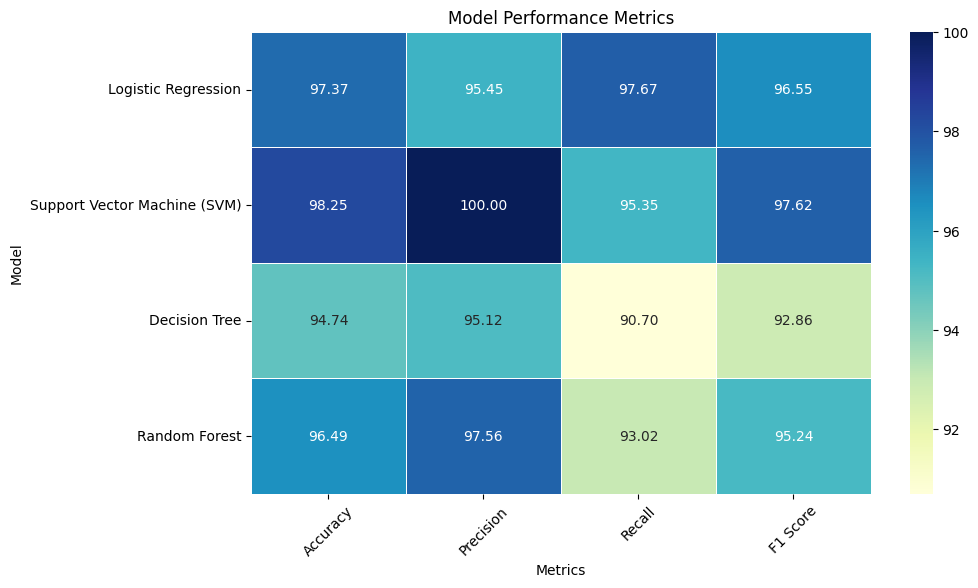

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "Model": ["Logistic Regression", "Support Vector Machine (SVM)", "Decision Tree", "Random Forest"],
    "Accuracy": [97.37, 98.25, 94.74, 96.49],
    "Precision": [95.45, 100.00, 95.12, 97.56],
    "Recall": [97.67, 95.35, 90.70, 93.02],
    "F1 Score": [96.55, 97.62, 92.86, 95.24]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set the Model column as index
df.set_index('Model', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15688\2316513116.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model, y=accuracies, palette='viridis')


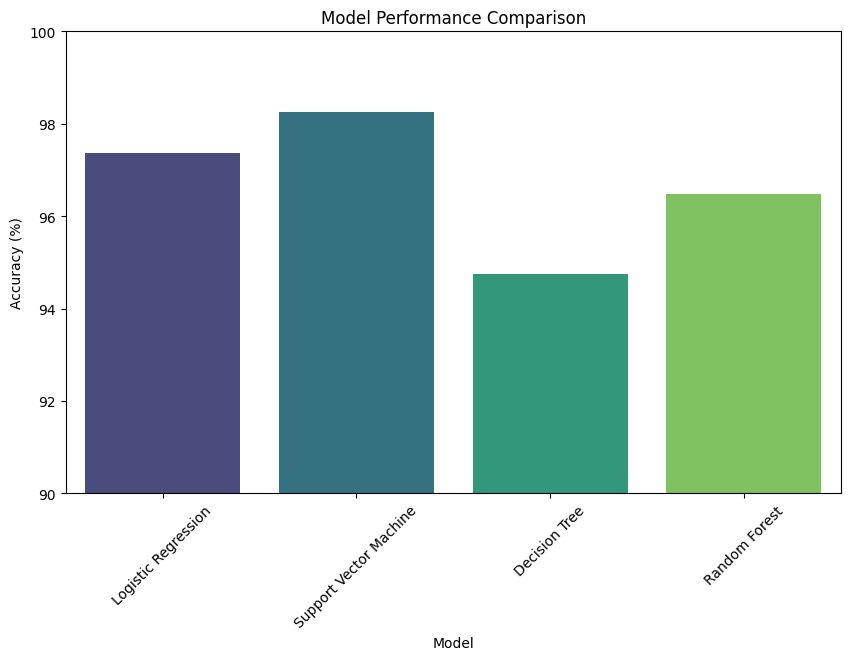

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for model performance
model = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
accuracies = [97.37, 98.25, 94.74, 96.49]

# Create a bar plot to visualize model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model, y=accuracies, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)
plt.xticks(rotation=45)
plt.show()


In [45]:
# Model Deployment (saving the model in you pc with the name 'best_model') (so that next time you can just import and model and do predictions)
best_model = max(models.values(), key=lambda x: accuracy_score(y_test, x.predict(X_test_scaled)))
joblib.dump(best_model, 'best_model.pkl')
print(f"Best performing model saved as 'best_model.pkl'")

Best performing model saved as 'best_model.pkl'


In [46]:
# Predictive System Development 
def predict_malignancy(features): #(a function which loads the model and perform prediction on a given set of features)
    model = joblib.load('best_model.pkl')
    features_scaled = scaler.transform([features]) # as we have trained the model on the scaled feature values, that's why here we need to scale the input values too
    prediction = model.predict(features_scaled)
    if prediction[0] == 0:
        return "Benign"
    else:
        return "Malignant"

# Example usage:
features = [19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758]
actual_class = "Malignant"
prediction = predict_malignancy(features)
print("Actual Class:", actual_class)
print("Predicted Class:", prediction)

Actual Class: Malignant
Predicted Class: Malignant


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
